In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


In [4]:
#Physics parameters
w0 = 1
w = 0.3    # Gamma/m  Gamma is the viscosity and m the mass 

In [11]:
puntos = 100
t = np.linspace(0, 20, puntos)
#t

In [12]:
def System(r, t, w0 , w):
    
    x, y, z, vx, vy, vz = r
    
    dxdt = vx
    
    dydt = vy
    
    dzdt = vz
    
    dvxdt = -w0 * vy * np.sin( w * t )
    
    dvydt = w0 * vx * np.sin( w * t )
    
    dvzdt = 0
    
    
    return [dxdt,dydt, dzdt, dvxdt, dvydt, dvzdt]

In [20]:
def Integrator2(f,r0,t,w0,w):
    
    h = t[1] - t[0]
    print(h)
    
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    z = np.zeros_like(t)
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    vz = np.zeros_like(t)
    
    x[0] = r0[0]
    y[0] = r0[1]
    z[0] = r0[2]
    
    vx[0] = r0[3]
    vy[0] = r0[4]
    vz[0] = r0[5]
    
    K1 = np.zeros(6)
    K2 = np.zeros(6)
    
    # Las pendientes instantaneas
    R = np.zeros(6)

    for i in range(1,len(t)):
        
        R = np.array([x[i-1], y[i-1], z[i-1], vx[i-1], vy[i-1], vz[i-1]])
        
        K1 = f(R,t[i-1],w0,w)
        
        R = np.array([x[i-1]+h*K1[0],y[i-1]+h*K1[1], z[i-1]+h*K1[2],vx[i-1]+h*K1[3],vy[i-1]+h*K1[4], vz[i-1]+h*K1[5]])
        
        K2 = f(R,t[i-1],w0,w)
        
        x[i] = x[i-1] + 0.5*h*(K1[0]+K2[0])
        y[i] = y[i-1] + 0.5*h*(K1[1]+K2[1])
        z[i] = z[i-1] + 0.5*h*(K1[2]+K2[2])
        
        vx[i] = vx[i-1] + 0.5*h*(K1[3]+K2[3])
        vy[i] = vy[i-1] + 0.5*h*(K1[4]+K2[4])
        vz[i] = vz[i-1] + 0.5*h*(K1[5]+K2[5])
        
    return x, y, z, vx, vy, vz

In [21]:
theta = 30*np.pi/180
r0 = [0., 0., 0., 0., 1., 1. ]

In [22]:
x, y, z, vx, vy, vz = Integrator2(System,r0,t, w0, w)

0.20202020202020202


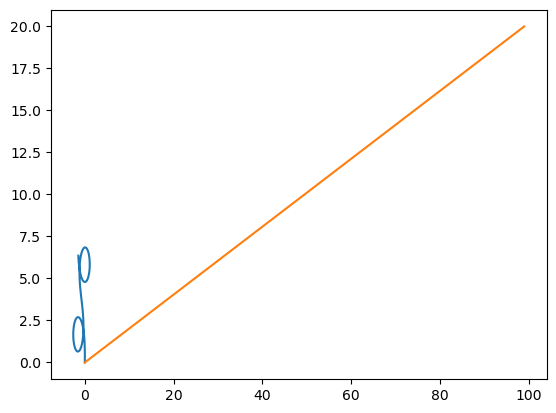

In [23]:

plt.plot(x,y,z)

In [28]:
r = integrate.odeint(System,r0,t,args=(w0,w))

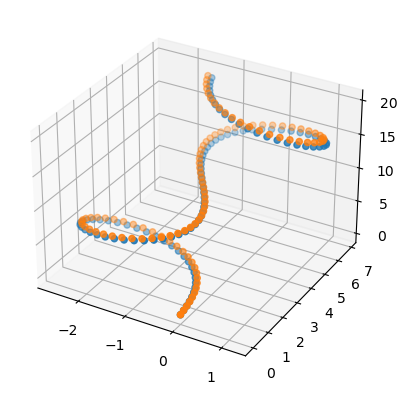

In [32]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")


ax.scatter(r[:,0],r[:,1],r[:,2])
ax.scatter(x,y,z)